# Supervised ML - Bike Sharing


This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


In [ ]:
urllink = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'

zipName = urllink.split('/')[-1]

In [6]:
from urllib.request import urlopen

# open and save the zip file onto computer
url = urlopen(urllink)
output = open(zipName, 'wb')    # note the flag:  "wb"        
output.write(url.read())
output.close()

from zipfile import ZipFile
# read zipfile and extract, then close
zipfile = ZipFile(zipName,'r')
ziplist = zipfile.namelist()
print(ziplist)

zipfile.extractall()
zipfile.close()

['Readme.txt', 'day.csv', 'hour.csv']


In [31]:
import pandas as pd

# read file
'''
df_day = pd.read_csv('day.csv')
print(df_day.columns)
print(df_day.shape)
'''
df_hour = pd.read_csv('hour.csv')
print(df_hour.columns)
print(df_hour.shape)


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
(17379, 17)


In [45]:
# temp : Normalized temperature in Celsius. 
# The values are derived via (t-t_min)/(t_max-t_min)
# t_min=-8, t_max=+39 (only in hourly scale)

def temp_Celcius(norm_t):
    t_min=-8
    t_max=+39
    return norm_t * (t_max-t_min) + t_min

df_hour['temp_Celcius'] = temp_Celcius(df_hour['temp'])

### Plotting bike count versus temperature 

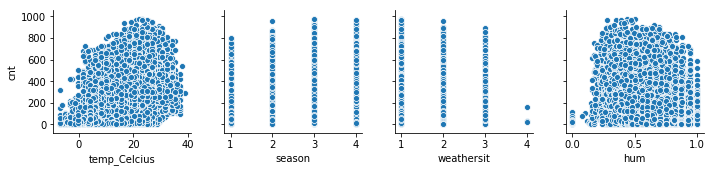

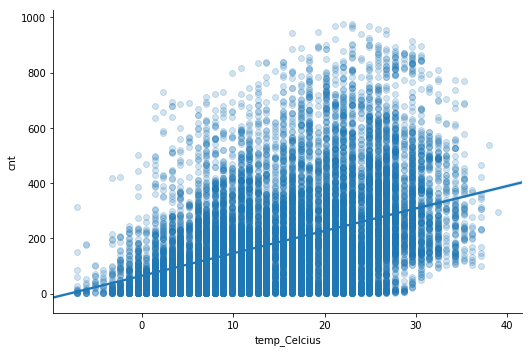

In [160]:
'''
import matplotlib.pyplot as plt
%matplotlib inline

df_hour.plot(kind='scatter', x='temp_Celcius', y='cnt', alpha=0.2);
'''
import seaborn as sns

# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df_hour, x_vars=['temp_Celcius', 'season', 'weathersit', 'hum'], y_vars='cnt');

#using seaborn to get a line of best fit
sns.lmplot(x='temp_Celcius', y='cnt', data=df_hour, aspect=1.5, scatter_kws={'alpha':0.2});

### Simple Linear Regression

Linear regression model is a regression model and can only be used to make prediction of continuous numbers.

In this section, a simple linear regression model is used to make a prediction by using single feature, specifically speaking effect of temperature in bike rental.


In [161]:
# check the correlation between temperature and bike rent count
df_hour[['cnt', 'temp_Celcius']].corr()

,cnt,temp_Celcius
cnt,1.000000,0.404772
temp_Celcius,0.404772,1.000000


There is a weak and positive correlation between two variables.

Now, lets build a Linear Regression model within these two variables by using Scikit-Learn

In [189]:
# create X and y
feature_cols = ['temp_Celcius']      # a lsit of the predictors
X = df_hour[feature_cols]            # subsetting our data to only the predictors
y = df_hour['cnt']                   # our response variable

# import scikit-learn, our machine learning module
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()          # instantiate a new model
linreg.fit(X, y)                     # fit the model to our data

# print the coefficients
print('Intercept:\t', linreg.intercept_)             # count when temp=0
print(feature_cols, '\t', linreg.coef_)                  # count when temp increase 1 Celcius

import numpy as np

t = np.array([20,30,40])             # some temperatures to predict bike rent count
print('Prediction\n', linreg.predict(t.reshape(-1, 1)))
print('R-squared of the model\n', linreg.score(X, y))


Intercept:	 64.86566725062117
['temp_Celcius'] 	 [8.11265792]
Prediction
 [227.11882566 308.24540486 389.37198407]
R-squared of the model
 0.16384059523903427


In [190]:
# prediction by using OLS (Ordinary Least Square)

import statsmodels.formula.api as smf

# create a fitted model
# this causes PatsyError while predicting, can not resolve equation name
lm = smf.ols(formula='cnt ~ temp_Celcius', data=df_hour).fit()
#lm = smf.ols(formula='cnt ~ temp_Celcius+hum', data=df_hour).fit()
print('=== lm.summary()\n', lm.summary(),'\n')
print('=== lm.params\n', lm.params,'\n')
print('=== lm.conf_int()\n', lm.conf_int(),'\n')   # confidence intervals, 95%
print('=== lm.pvalues\n', lm.pvalues, '\n')
print('=== lm.rsquared\n', lm.rsquared, '\n')

olsmod = smf.OLS(df_hour['cnt'], df_hour['temp_Celcius']).fit()
olsmod = smf.OLS(y, X).fit()
print('=== olsmod.summary()\n',olsmod.summary(),'\n')
print('=== olsmod.params\n', olsmod.params,'\n')
print('=== olsmod.conf_int()\n', olsmod.conf_int(),'\n')   # confidence intervals, 95%
print('=== olsmod.pvalues\n', olsmod.pvalues, '\n')

# OLS model accept DataFrame as argument
X_new = pd.DataFrame({'temp': t})
print('=== olsmod.predict()\n',olsmod.predict(X_new),'\n')

=== lm.summary()
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     3405.
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:28:20   Log-Likelihood:            -1.1349e+05
No. Observations:               17379   AIC:                         2.270e+05
Df Residuals:                   17377   BIC:                         2.270e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       64.8657      2

### Predicting for multiple features (LinearRegression)

• temp_Celcius: Temperature in Celsius

• season: 1 = spring, 2 = summer, 3 = fall, 4 = winter

• weather:
1. Clear, Few clouds, Partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

• hum: Relative humidity


In [191]:
# create a list of features
feature_cols = ['temp_Celcius', 'season', 'weathersit', 'hum']

# create X and y
X = df_hour[feature_cols]
y = df_hour['cnt']

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('temp_Celcius', 6.968563688883241),
 ('season', 19.637825963625158),
 ('weathersit', 9.423299897252543),
 ('hum', -310.7772610685748)]

In [197]:
linreg.score(X,y)

0.26408137988551483

• When all other predictors constant, a 1 unit increase in temperature is associated with a rental increase of ~7 bikes

• When all other predictors constant, a 1 unit increase in season is associated with a rental increase of ~20 bikes

• When all other predictors constant, a 1 unit increase in weather is associated with a rental increase of ~9 bikes

• When all other predictors constant, a 1 unit increase in humidity is associated with a rental decrease of ~-310 (!) bikes

Now, lets look at the individual scatter plots between each predictor and the response. That is required to understand which of the predictors (features) would help to make the prediction, and which ones are just noise. To do so, some more advanced metrics should be used.


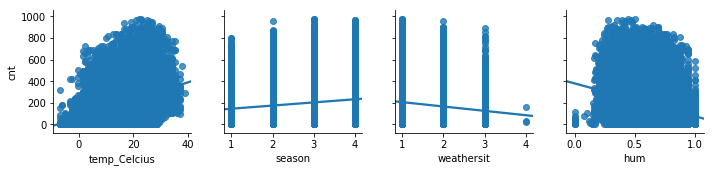

In [82]:
# multiple scatter plots
sns.pairplot(df_hour, x_vars=feature_cols, y_vars='cnt', kind='reg');

In [203]:
# function that splits data into training and testing sets
from sklearn.model_selection import train_test_split

feature_cols = ['temp_Celcius']
X = df_hour[feature_cols]
y = df_hour['cnt']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y) 

# X_train and y_train will be used to train the model
# X_test and y_test will be used to test the model
linreg = LinearRegression()

# instantiate the model
linreg.fit(X_train, y_train)

# fit the model to our training set
y_pred = linreg.predict(X_test)

# predict our testing set
print('RMSE\n', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # RMSE

RMSE
 168.18394639645166


In [205]:
feature_cols = ['temp_Celcius', 'season', 'weathersit', 'hum']
X = df_hour[feature_cols]
y = df_hour['cnt']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y) 

# X_train and y_train will be used to train the model
# X_test and y_test will be used to test the model
linreg = LinearRegression()

# instantiate the model
linreg.fit(X_train, y_train)

# fit the model to our training set
y_pred = linreg.predict(X_test)

# predict our testing set
print('RMSE\n', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # RMSE

RMSE
 154.30948741930624


In [213]:
# In this dataset, regardless of weather, time, day of the week, humidity, and everything else, 
# find out the average number of bikes that go out every hour

av_bike_rent = df_hour.cnt.mean()          # average hourly bike rental
print('av_bike_rent\t', av_bike_rent)
num_rows = df_hour.shape[0]                # number of rows 

# now generating a fake prediciton list
null_model_pred = [av_bike_rent]*num_rows  # create null model whether the prediciton is ok
print('RMSE\t\t',np.sqrt(metrics.mean_squared_error(y, null_model_pred)))

av_bike_rent	 189.46308763450142
RMSE		 181.38238043116908
